<a href="https://colab.research.google.com/github/Wo0druff/smiles-solubility-demo/blob/main/smiles_solubility_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install libraries

In [ ]:
# Install RDKit in Colab
!pip install rdkit
!pip install scikit-learn matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 45.0 MB/s eta 0:00:00


In [ ]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# 2. Import libraries

In [ ]:
# ========================
# 2. Import libraries
# ========================
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 3. Load data

In [ ]:
# ========================
# 3. Load data
# ========================
# Example: ESOL dataset (solubility)
# Download CSV from GitHub (can be replaсed with your own)
url = "https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv"
df = pd.read_csv(url)
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


# 4. Generate descriptors

In [ ]:
# ========================
# 4. Generate descriptors
# ========================
smiles_list = df['smiles'].tolist()

# List of available descriptors in RDKit
descriptor_names = [desc[0] for desc in Descriptors._descList]

calc = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def smiles_to_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return calc.CalcDescriptors(mol)
    else:
        return [np.nan] * len(descriptor_names)

X = [smiles_to_descriptors(s) for s in smiles_list]
X = pd.DataFrame(X, columns=descriptor_names)

y = df['measured log solubility in mols per litre']
X.shape, y.shape

((1128, 217), (1128,))

# 5. Preprocessing

In [ ]:
# ========================
# 5. Preprocessing
# ========================
# Remove columns with NaN values
X = X.dropna(axis=1)

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Model

In [ ]:
# ========================
# 6. Model
# ========================
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# 7. Visualization

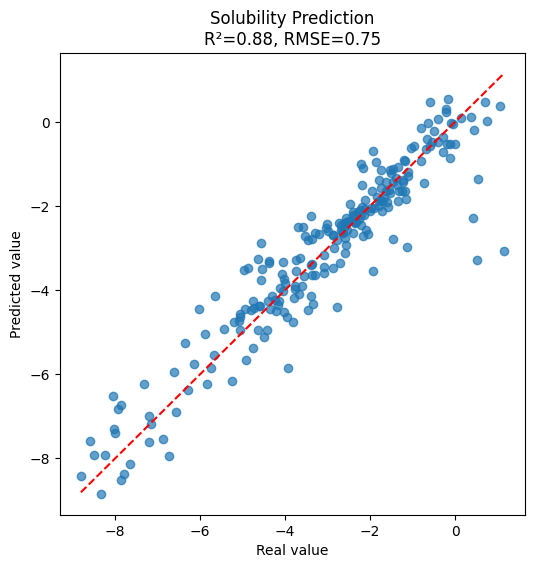

In [ ]:
# ========================
# 7. Visualization
# ========================
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title(f"Solubility Prediction\nR²={r2:.2f}, RMSE={rmse:.2f}")
plt.show()